### `Import the libraries`

In [2]:
## major
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno


## sklearn -- preprocessing
from sklearn.preprocessing import StandardScaler

## sklearn -- metrics
from sklearn.metrics import silhouette_score

## sklearn -- models
from sklearn.cluster import KMeans,DBSCAN

### `Reading the Dataset and Look at the big picture`"

In [3]:
df=pd.read_csv("Mall_Customers.csv").drop(columns="CustomerID", axis=1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [4]:
df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})
df

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual Income   200 non-null    int64 
 3   Spending Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [6]:
df.describe()

,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
df.columns

Index(['Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

In [8]:
df.isna().sum().sort_values(ascending=False) 

Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

# EDA

In [11]:
numerical_features=df.select_dtypes(include="number").columns.to_list()
caterogical_features=df.select_dtypes(exclude="number").columns.to_list()

In [12]:
numerical_features

['Age', 'Annual Income', 'Spending Score']

In [13]:
caterogical_features

['Gender']

## univariate analysis

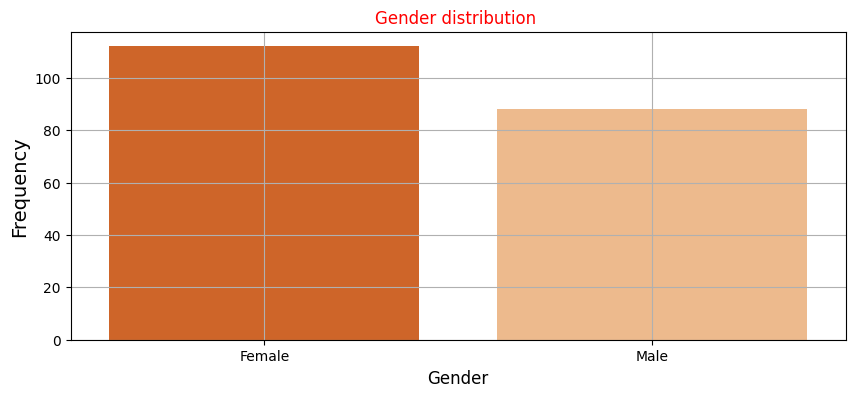

In [14]:
for feature in caterogical_features:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=feature, hue=feature, palette="Oranges", order=df[feature].value_counts().index, legend=False)
    plt.xlabel(feature,fontsize=12,color="black")
    plt.ylabel("Frequency",fontsize=14,color="black")
    plt.title(f"{feature} distribution ",fontsize=12,color="red")
    plt.grid()
    plt.show()

* `Gender is nearly balanced, with a slight majority of females.`

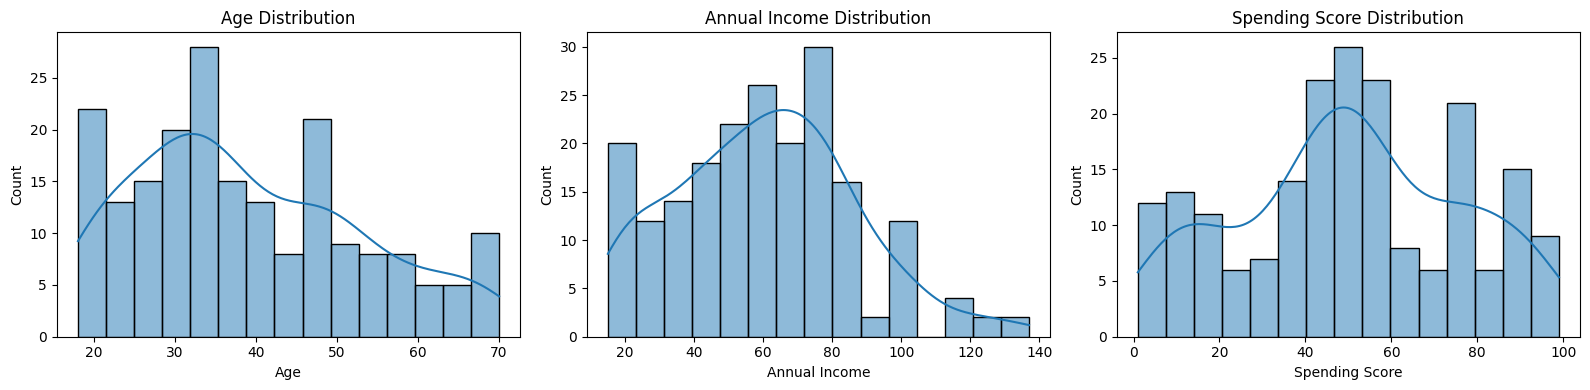

In [15]:
plt.figure(figsize=(16,4))
for i, col in enumerate(['Age', 'Annual Income', 'Spending Score']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], bins=15, kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

* `Most customers are young adults; income and spending are widely spread.`

## Bivariate analysis

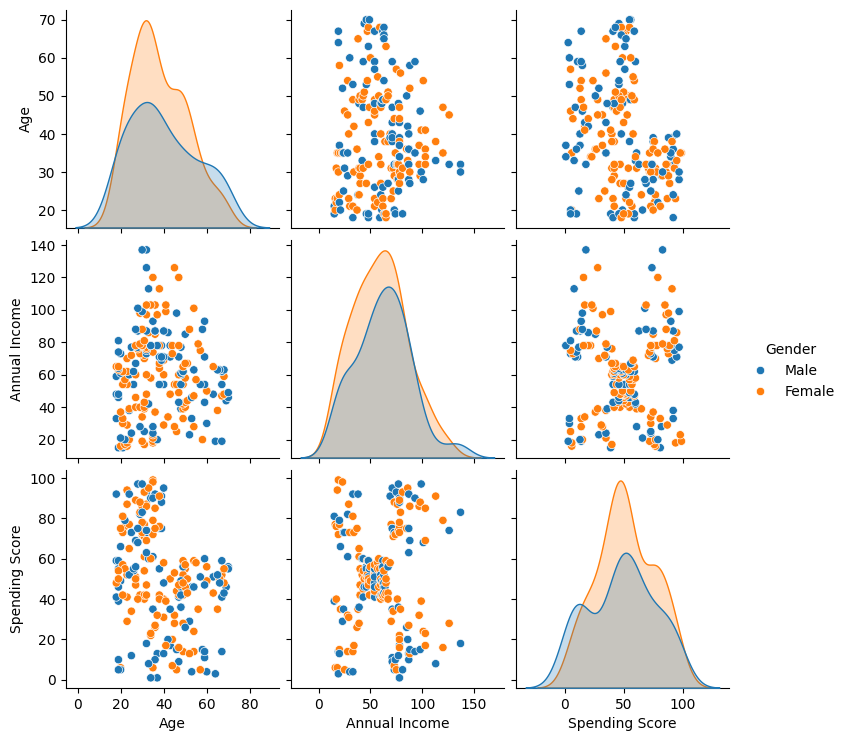

In [16]:
sns.pairplot(df, vars=['Age','Annual Income','Spending Score'], hue='Gender', height=2.5)
plt.show()

* `Spending does not depend strictly on income or age. There's a variety of behaviors.`

# Data preprocessing 

## `Cluster customers into segments based on income and spending score`

In [27]:
X = df[['Annual Income', 'Spending Score']]

### ` Perform scaling and visual exploration of groupings`

In [28]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
pd.DataFrame(X)

,0,1
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


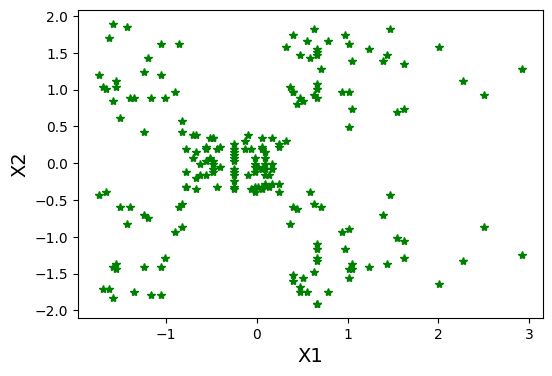

In [30]:
plt.figure(figsize=(6, 4))
plt.plot(X[:, 0], X[:, 1], 'g*')
plt.xlabel('X1', fontsize=14)
plt.ylabel('X2', fontsize=14)
plt.show()

# Buliding Models

### `Determine optimal number of clusters`

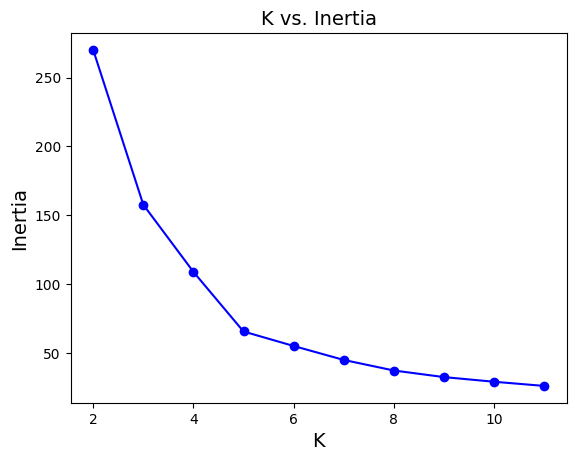

In [33]:
# Choose the optimal value of k for elbow method

k_choose = np.arange(2, 12, 1)

k_with_inertia = {}

for k in k_choose:
    each_kmeans = KMeans(n_clusters=k, n_init=10, random_state=45)
    each_kmeans.fit(X)

    # Get interia
    k_with_inertia[k] = each_kmeans.inertia_

# Draw to get the best value for k

plt.plot(k_with_inertia.keys(), k_with_inertia.values(), 'bo-')
plt.title('K vs. Inertia', fontsize=14)
plt.xlabel('K', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.show()  # optimal according to elbow method that k=5

### `K-Means`

In [37]:
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans.fit(X)

,n_clusters,5
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [38]:
cluster_no = kmeans.predict(X)
cluster_no

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

* `From the graph the optimal K=6`

In [39]:
sil = silhouette_score(X, df['Cluster'])
print(f"Silhouette Score: {sil:.3f}")

Silhouette Score: 0.316


In [40]:
df_kmeans = pd.DataFrame(np.c_[X, cluster_no], columns=[
                         'x1', 'x2', 'cluster_no'])
df_kmeans

,x1,x2,cluster_no
0,-1.738999,-0.434801,4.0
1,-1.738999,1.195704,2.0
2,-1.700830,-1.715913,4.0
3,-1.700830,1.040418,2.0
4,-1.662660,-0.395980,4.0
...,...,...,...
195,2.268791,1.118061,1.0
196,2.497807,-0.861839,3.0
197,2.497807,0.923953,1.0
198,2.917671,-1.250054,3.0


<Axes: xlabel='x1', ylabel='x2'>

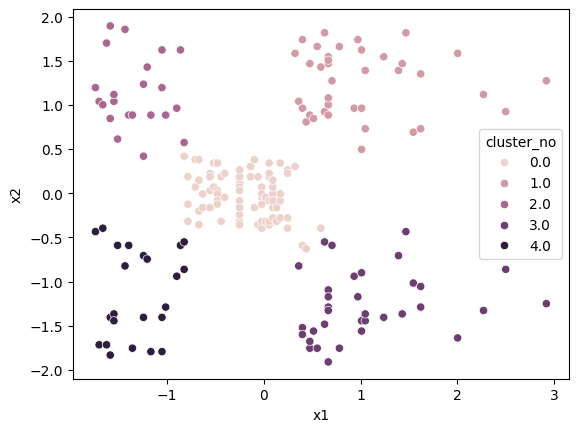

In [41]:
sns.scatterplot(data=df_kmeans, x='x1', y='x2', hue='cluster_no')

# Bonus

# DBSCAN

In [43]:
dbscan = DBSCAN(eps=.4, min_samples=5)
db_clusters = dbscan.fit_predict(X)

In [44]:
df_dbscan = pd.DataFrame(np.c_[X, db_clusters], columns=[
                         'x1', 'x2', 'cluster_no'])
df_dbscan

,x1,x2,cluster_no
0,-1.738999,-0.434801,0.0
1,-1.738999,1.195704,0.0
2,-1.700830,-1.715913,1.0
3,-1.700830,1.040418,0.0
4,-1.662660,-0.395980,0.0
...,...,...,...
195,2.268791,1.118061,-1.0
196,2.497807,-0.861839,-1.0
197,2.497807,0.923953,-1.0
198,2.917671,-1.250054,-1.0


<Axes: xlabel='x1', ylabel='x2'>

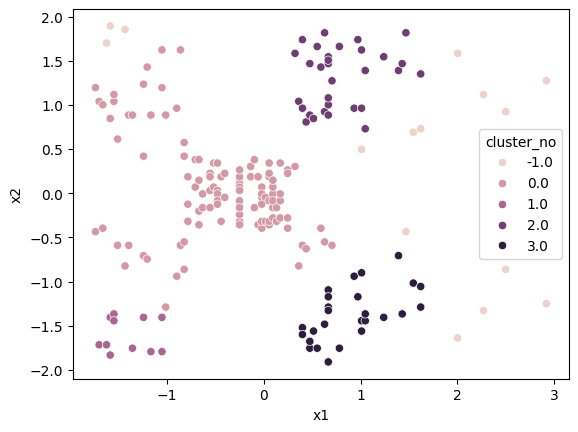

In [45]:
sns.scatterplot(data=df_dbscan, x='x1', y='x2', hue='cluster_no')

based on these results K-means model is better than DBSCAN in this task

### `Analyze average spending per cluster`

In [49]:
df['cluster_no'] = cluster_no

In [51]:
summary = df.groupby('cluster_no')['Spending Score'].mean()
print("Average Spending Per Cluster:\n", summary)

Average Spending Per Cluster:
 cluster_no
0    49.518519
1    82.128205
2    79.363636
3    17.114286
4    20.913043
Name: Spending Score, dtype: float64
